<a href="https://colab.research.google.com/github/LaraMijic/IS-4487/blob/main/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv(r'superstore_retail_orders (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [4]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

**Add Sales Revenue Column**

In [6]:
df['sales_revenue'] = df['product_price'] * df['quantity']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
 10  sales_revenue     56006 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.7+ MB


**Removing date outliers and converting order_date and order_year_month to datetime data types**

In [8]:
df = df[
    (df['order_year_month'] != '2421-09') &
    (df['order_year_month'] != '2029-08') &
    (df['order_year_month'] != '2029-07') &
    (df['order_year_month'] != '2029-06') &
    (df['order_year_month'] != '1922-06')
]

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce').dt.date
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

<ipython-input-9-720072c39c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce').dt.date
<ipython-input-9-720072c39c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55841 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          55841 non-null  int64         
 1   order_date        55809 non-null  datetime64[ns]
 2   order_year_month  55809 non-null  object        
 3   customer_name     55841 non-null  object        
 4   city              55367 non-null  object        
 5   state_province    55367 non-null  object        
 6   quantity          55802 non-null  float64       
 7   product_name      55841 non-null  object        
 8   product_line      55841 non-null  object        
 9   product_price     55841 non-null  float64       
 10  sales_revenue     55802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 5.1+ MB


**Impute missing quantity values**

I tried to impute after I removed outliers but then I had removed all of the nulls from the dataset for the price and quantity variables. I wouldn't normally impute at this point because the outlier quantities will skew the average, which will not create the most reasonable estimate of the quantity values for missing entries, so I will impute with median instead of average to control for this.

In [11]:
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

<ipython-input-11-ff9aba287097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'] = df['quantity'].fillna(df['quantity'].median())


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55841 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          55841 non-null  int64         
 1   order_date        55809 non-null  datetime64[ns]
 2   order_year_month  55809 non-null  object        
 3   customer_name     55841 non-null  object        
 4   city              55367 non-null  object        
 5   state_province    55367 non-null  object        
 6   quantity          55841 non-null  float64       
 7   product_name      55841 non-null  object        
 8   product_line      55841 non-null  object        
 9   product_price     55841 non-null  float64       
 10  sales_revenue     55802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 5.1+ MB


**Look for outliers & remove**

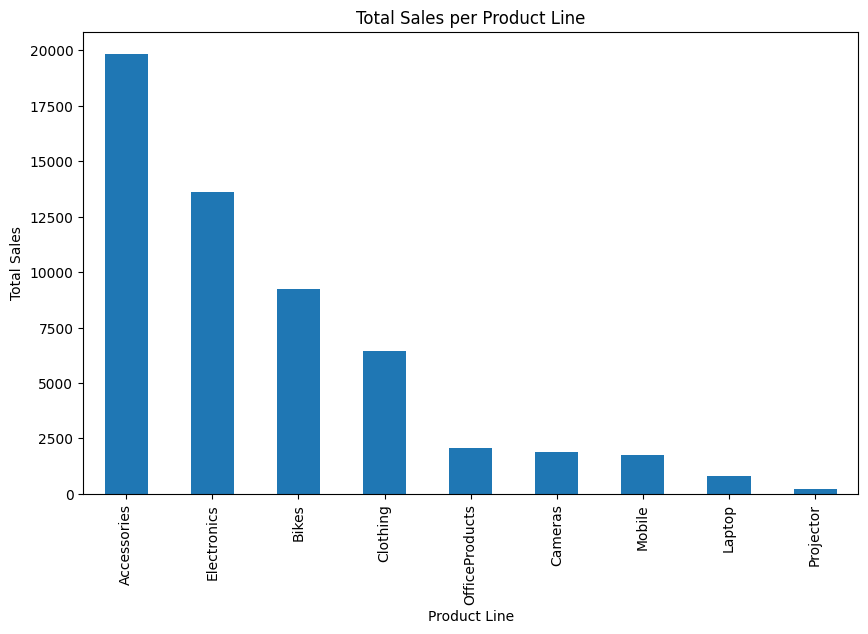

In [13]:
#bar chart

#count of product to find total number of sales
total_sales = df['product_line'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
total_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Line')
plt.show()

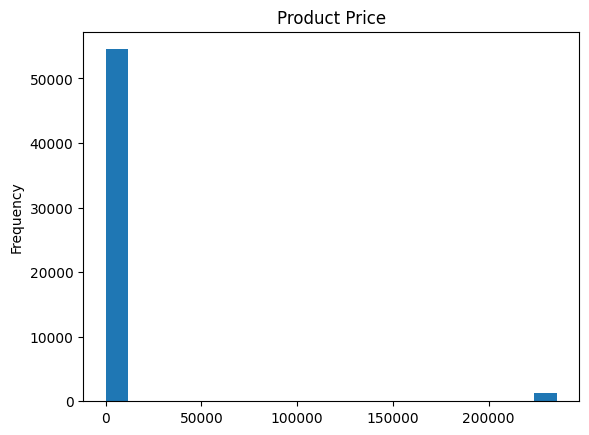

In [14]:
#histogram
hist = df['product_price'].plot.hist(bins=20,title='Product Price')

In [15]:
df_price_over_200k = df[(df['product_price'] > 200000)]

In [16]:
df_price_over_200k.head(20)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
36547,51189,2021-07-02,2021-07,Tabitha Gomez,Lake Katrina,NEW YORK,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36548,51316,2021-07-09,2021-07,Bethany Deng,South Melissafort,HAWAII,3.0,"Half-Finger Gloves, L",Clothing,235481.0,706443.0
36549,51390,2021-07-13,2021-07,Deanna Rodriguez,Cunninghamton,UTAH,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36550,51428,2021-07-16,2021-07,Margaret He,Port Kevin,OREGON,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36551,51578,2021-07-25,2021-07,Gilbert Pal,Fordfort,OREGON,1.0,"Half-Finger Gloves, L",Clothing,235481.0,235481.0
36552,51589,2021-07-26,2021-07,Linda Navarro,Ronaldbury,SOUTH DAKOTA,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36553,51654,2021-07-29,2021-07,Luis Simmons,Scottfurt,NEW HAMPSHIRE,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36554,51884,2021-08-01,2021-08,Barbara Zhang,Davidbury,PENNSYLVANIA,1.0,"Half-Finger Gloves, L",Clothing,235481.0,235481.0
36555,51990,2021-08-03,2021-08,Caleb Flores,East Tara,VERMONT,3.0,"Half-Finger Gloves, L",Clothing,235481.0,706443.0
36556,52040,2021-08-04,2021-08,Jessica Thomas,Fryeland,SOUTH CAROLINA,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0


In [17]:
df_price_over_200k.tail()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
37873,73990,2022-06-28,2022-06,Andy Hernandez,New Debbie,NEW MEXICO,1.0,"Half-Finger Gloves, S",Clothing,235481.0,235481.0
37874,74013,2022-06-28,2022-06,Brandi Serrano,New Elizabeth,OREGON,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37875,74012,2022-06-28,2022-06,Brandon Sharma,Blevinsland,CONNECTICUT,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37877,74044,2022-06-29,2022-06,Andre Gonzalez,Bennetttown,MONTANA,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37878,74143,2022-06-30,2022-06,Troy Gonzalez,Joneschester,WISCONSIN,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0


In [18]:
df_price_over_200k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 36547 to 37878
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1329 non-null   int64         
 1   order_date        1328 non-null   datetime64[ns]
 2   order_year_month  1328 non-null   object        
 3   customer_name     1329 non-null   object        
 4   city              1324 non-null   object        
 5   state_province    1324 non-null   object        
 6   quantity          1329 non-null   float64       
 7   product_name      1329 non-null   object        
 8   product_line      1329 non-null   object        
 9   product_price     1329 non-null   float64       
 10  sales_revenue     1329 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 124.6+ KB


This product price in the above dataframe looks like an error. It seems unlikely that the product price would be over 200K for half-finger gloves. This also appears to be the only product in the filtered data frame that has a price above 200,000. Therefore, I will filter out products with prices over 200K to give a more accurate representation in the histogram.

In [19]:
df_price_cleaned = df[(df['product_price'] < 200000)]

In [20]:
df_price_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54512 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54512 non-null  int64         
 1   order_date        54481 non-null  datetime64[ns]
 2   order_year_month  54481 non-null  object        
 3   customer_name     54512 non-null  object        
 4   city              54043 non-null  object        
 5   state_province    54043 non-null  object        
 6   quantity          54512 non-null  float64       
 7   product_name      54512 non-null  object        
 8   product_line      54512 non-null  object        
 9   product_price     54512 non-null  float64       
 10  sales_revenue     54473 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 5.0+ MB


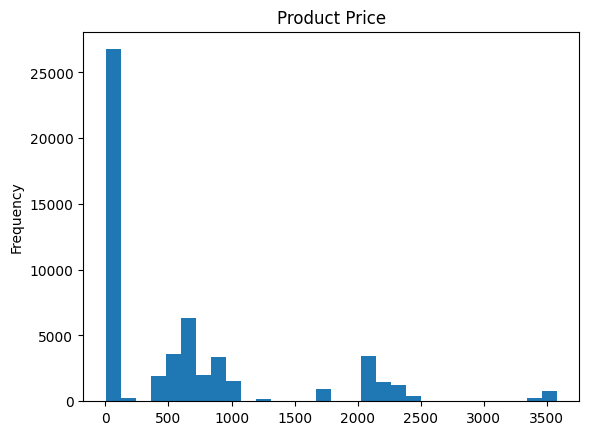

In [21]:
#histogram
hist = df_price_cleaned['product_price'].plot.hist(bins=30,title='Product Price')

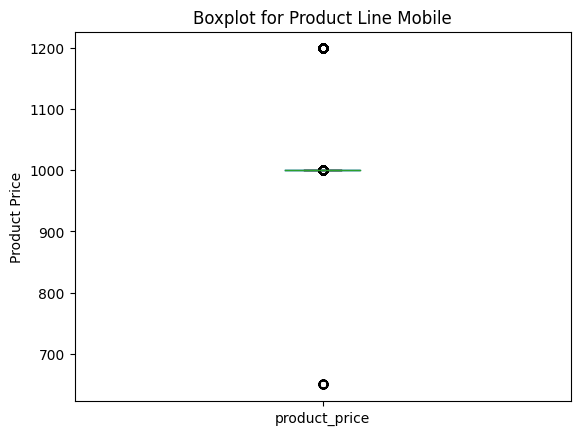

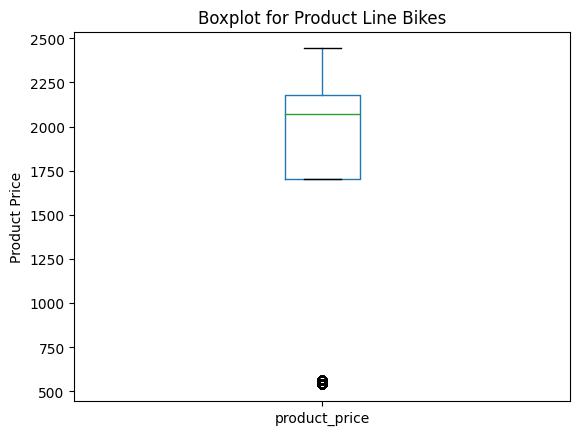

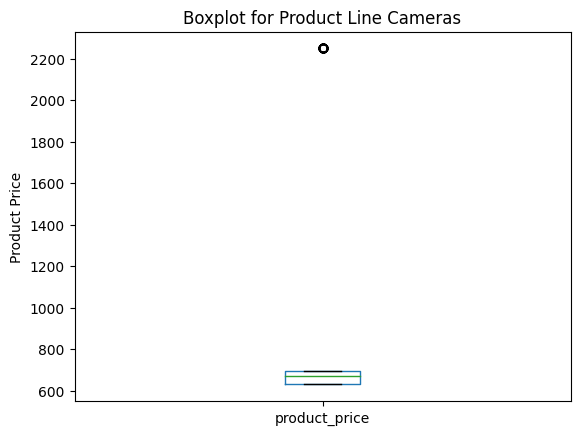

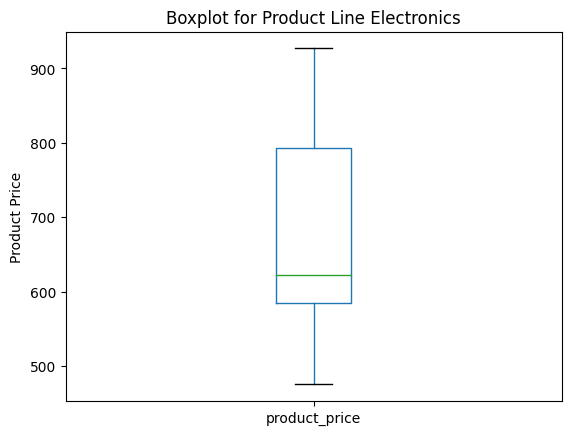

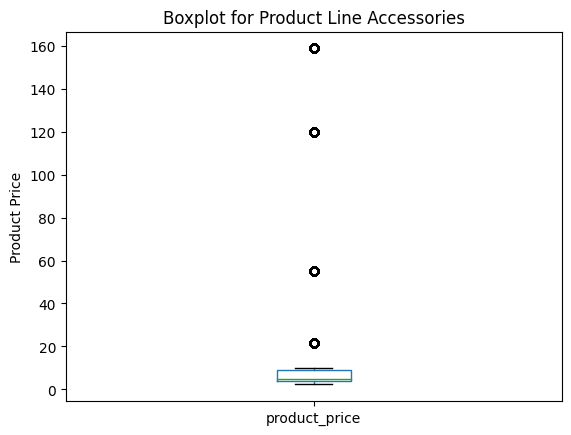

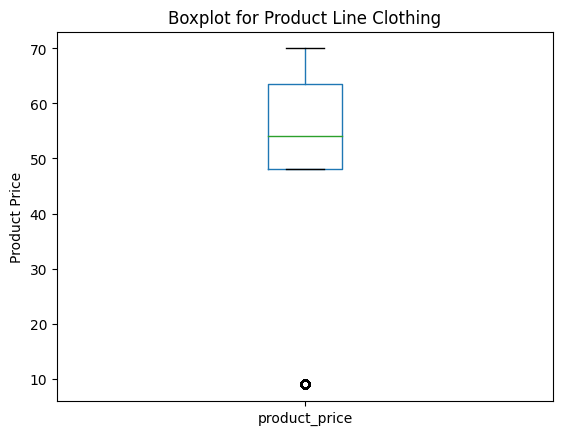

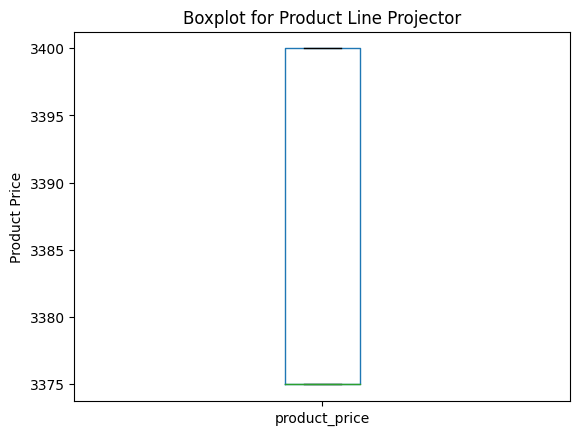

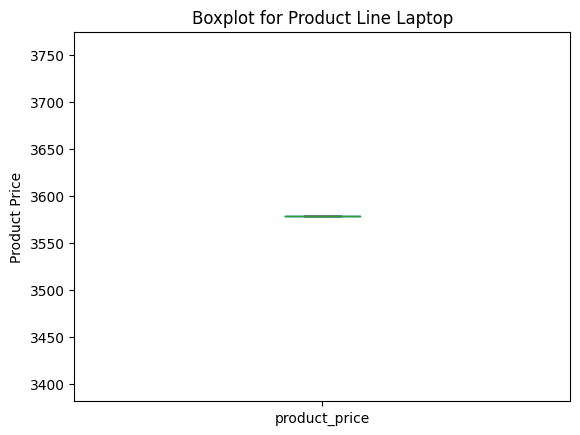

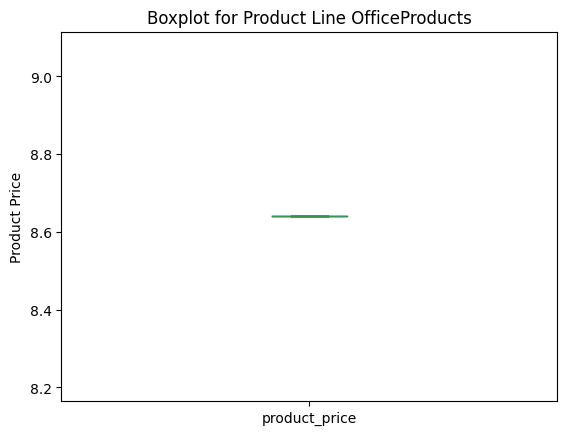

In [22]:
#boxplot
categories = df_price_cleaned['product_line'].unique()

# Plot boxplots for each category
for category in categories:
    plt.figure()  # Create a new figure for each category
    df_category = df_price_cleaned[df_price_cleaned['product_line'] == category]
    df_category.boxplot(column='product_price', grid=False)
    plt.title(f'Boxplot for Product Line {category}')
    plt.ylabel('Product Price')

plt.show()

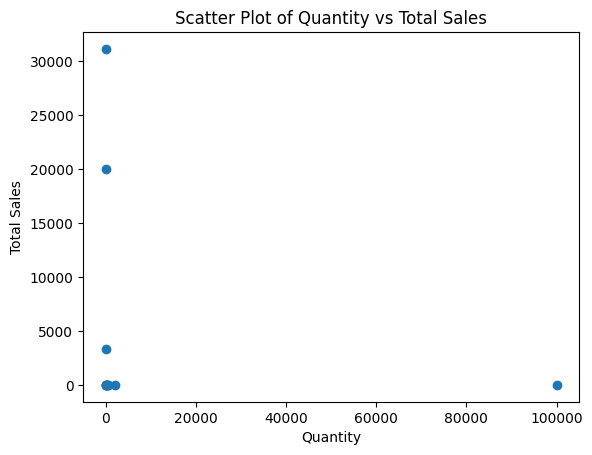

In [23]:
#scatter plot
sales_count = df_price_cleaned['quantity'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

In [24]:
df_q_over_90k = df_price_cleaned[(df_price_cleaned['quantity'] > 90000)]

In [25]:
df_q_over_90k.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
33823,66829,2022-03-25,2022-03,Destiny Smith,New Hannahborough,INDIANA,100000.0,Water Bottle - 30 oz.,Accessories,4.99,499000.0


In [26]:
df_price_quantity_cleaned = df_price_cleaned[(df_price_cleaned['quantity'] < 100000)]

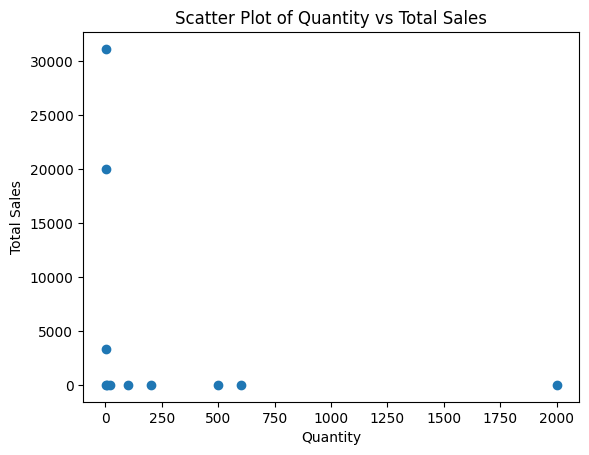

In [27]:
#scatter plot
sales_count = df_price_quantity_cleaned['quantity'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

In [28]:
df_q_over_100 = df_price_quantity_cleaned[(df_price_quantity_cleaned['quantity'] >= 100)]

In [29]:
df_q_over_100.head(10)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
33728,66374,2022-03-18,2022-03,David Jenkins,Port Christina,IDAHO,200.0,Water Bottle - 30 oz.,Accessories,4.99,998.0
44628,45087,2020-01-03,2020-01,Joseph Martin,Rogersborough,NEVADA,600.0,"Projector Black, 44",Projector,3374.99,2024994.0
45532,45086,2020-01-02,2020-01,Jacquelyn Diaz,Whitneyborough,WEST VIRGINIA,100.0,Gaming Laptop,Laptop,3578.27,357827.0
45859,45085,2020-01-02,2020-01,Reginald Alvarez,Lake Kellyland,WASHINGTON,500.0,Gaming Laptop Silver,Laptop,3578.27,1789135.0
55310,66470,2022-03-19,2022-03,Lisa Wang,Baileychester,SOUTH DAKOTA,2000.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,1829240.0


Not sure about the quantities under 2000 they could have been ordered for schools or such, but will remove the 2000 in case.

In [30]:
df_price_quantity_cleaned = df_price_quantity_cleaned[(df_price_quantity_cleaned['quantity'] < 2000)]

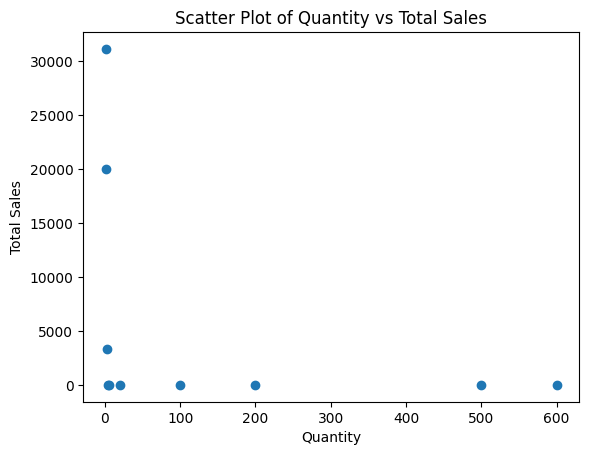

In [31]:
#scatter plot
sales_count = df_price_quantity_cleaned['quantity'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

In [32]:
df_price_quantity_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54510 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54510 non-null  int64         
 1   order_date        54479 non-null  datetime64[ns]
 2   order_year_month  54479 non-null  object        
 3   customer_name     54510 non-null  object        
 4   city              54041 non-null  object        
 5   state_province    54041 non-null  object        
 6   quantity          54510 non-null  float64       
 7   product_name      54510 non-null  object        
 8   product_line      54510 non-null  object        
 9   product_price     54510 non-null  float64       
 10  sales_revenue     54471 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 5.0+ MB


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [33]:
def check_nulls(row):
    if row.isnull().any():
        return 2  # If nulls are present, return 2
    else:
        return 1  # If no nulls, return 1

# Apply the function row-wise
df_price_quantity_cleaned['complete_customer_info'] = df.apply(lambda row: check_nulls(row), axis=1)

In [34]:
df_price_quantity_cleaned.tail(6)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info
56039,74055,NaT,NaN,Francis Ortega,Port Cynthiatown,WASHINGTON,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,2
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,1
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,1
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,1
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,1
56044,74110,2022-06-30,2022-06,Mallory Jimenez,Dillonhaven,MARYLAND,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,914.62,1


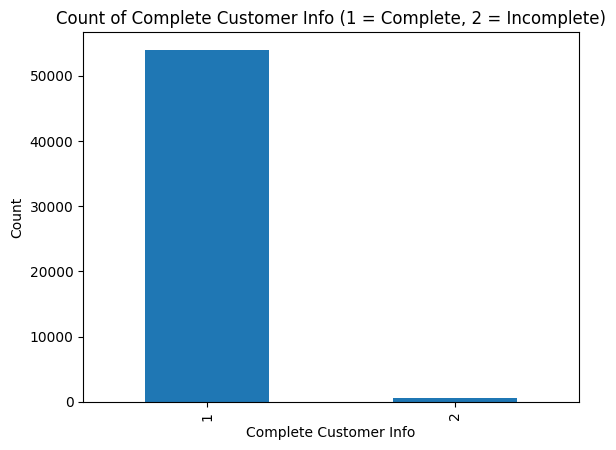

In [35]:
df_price_quantity_cleaned['complete_customer_info'].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Complete Customer Info')
plt.ylabel('Count')
plt.title('Count of Complete Customer Info (1 = Complete, 2 = Incomplete)')

# Show the plot
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [36]:
bins = [0, 3, 6, 9, 12]
labels = ['Winter', 'Spring', 'Summer', 'Fall']

# Create a new column 'season' based on the bins
df_price_quantity_cleaned['season'] = pd.cut(df['order_date'].dt.month, bins=bins, labels=labels, right=False)


In [37]:
df_season = df_price_quantity_cleaned[(df_price_quantity_cleaned['season'] == 'Fall')]

In [38]:
df_season.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season
38,53863,2021-09-05,2021-09,Evelyn Mehta,Lynchville,RHODE ISLAND,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Fall
39,53869,2021-09-05,2021-09,Julia Roberts,Davisfort,NEW MEXICO,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Fall
40,53918,2021-09-06,2021-09,Brendan Deng,East Malloryfurt,DELAWARE,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall
41,53967,2021-09-07,2021-09,Edwin Li,North Heathermouth,MASSACHUSETTS,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall
42,54100,2021-09-09,2021-09,Linda Navarro,Ronaldbury,SOUTH DAKOTA,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall


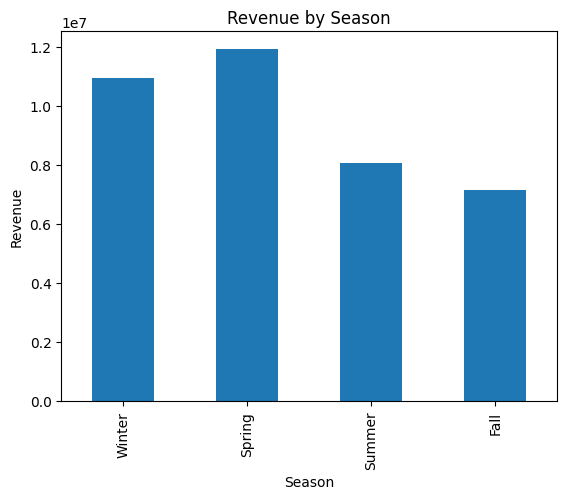

In [39]:
seasonal_revenue = df_price_quantity_cleaned.groupby('season')['sales_revenue'].sum()

# Plotting the bar chart
seasonal_revenue.plot(kind='bar')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')

# Show the plot
plt.show()

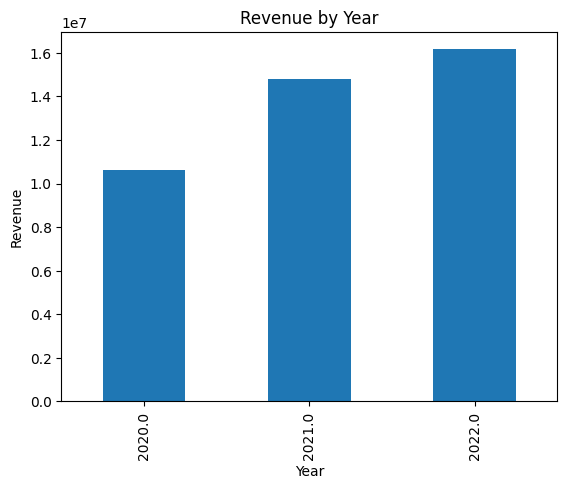

In [40]:
df_price_quantity_cleaned['year'] = df_price_quantity_cleaned['order_date'].dt.year

# Group by 'year' and sum 'sales_revenue'
yearly_revenue = df_price_quantity_cleaned.groupby('year')['sales_revenue'].sum()

# Plotting the bar chart
yearly_revenue.plot(kind='bar')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')

# Show the plot
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

**Checking what product lines are comprised of to understand if it's outdoor vs indoor**

In [41]:
df_accessories = df_price_quantity_cleaned[(df_price_quantity_cleaned['product_line'] == 'Accessories')]

In [42]:
df_accessories.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season,year
7989,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,2.0,LL Road Tire,Accessories,21.49,42.98,1,Summer,2021.0
7990,51222,2021-07-03,2021-07,Dana Schmidt,East Lorimouth,MINNESOTA,1.0,LL Road Tire,Accessories,21.49,21.49,1,Summer,2021.0
7991,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,LL Road Tire,Accessories,21.49,21.49,1,Summer,2021.0
7992,51243,2021-07-04,2021-07,Jaime Ruiz,Mikaylaton,TENNESSEE,2.0,LL Road Tire,Accessories,21.49,42.98,1,Summer,2021.0
7993,51244,2021-07-04,2021-07,Virginia Fernandez,Alexfurt,MINNESOTA,3.0,LL Road Tire,Accessories,21.49,64.47,1,Summer,2021.0


In [43]:
df_clothing = df_price_quantity_cleaned[(df_price_quantity_cleaned['product_line'] == 'Clothing')]

In [44]:
df_clothing.tail()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season,year
47944,73825,2022-06-26,2022-06,Kelvin Nara,New Melissa,NEW YORK,1.0,"Long-Sleeve Logo Jersey, S",Clothing,48.07,48.07,1,Summer,2022.0
47945,73935,2022-06-27,2022-06,Ian Bryant,Virginiaport,LOUISIANA,1.0,"Long-Sleeve Logo Jersey, S",Clothing,48.07,48.07,1,Summer,2022.0
47946,73986,2022-06-28,2022-06,Chloe Robinson,Lake Paige,WEST VIRGINIA,1.0,"Long-Sleeve Logo Jersey, S",Clothing,48.07,48.07,1,Summer,2022.0
47947,73959,2022-06-28,2022-06,Luke Ross,Walshville,WYOMING,1.0,"Long-Sleeve Logo Jersey, S",Clothing,48.07,48.07,1,Summer,2022.0
47948,74095,2022-06-29,2022-06,Arturo Deng,Daughertymouth,TENNESSEE,1.0,"Long-Sleeve Logo Jersey, S",Clothing,48.07,48.07,1,Summer,2022.0


In [45]:
distinct_clothing_names = df_clothing['product_name'].unique().tolist()

In [46]:
print(distinct_clothing_names)

['Short-Sleeve Classic Jersey, XL', 'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M', 'Short-Sleeve Classic Jersey, S', 'Racing Socks, L', 'Racing Socks, M', "Women's Mountain Shorts, L", "Women's Mountain Shorts, M", "Women's Mountain Shorts, S", 'Classic Vest, L', 'Classic Vest, M', 'Classic Vest, S', 'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L', 'Long-Sleeve Logo Jersey, M', 'Long-Sleeve Logo Jersey, S']


All clothing items seem to be for sports or hiking. Therefore, will classify as outdoor.

In [47]:
df_cameras = df_price_quantity_cleaned[(df_price_quantity_cleaned['product_line'] == 'Cameras')]

In [48]:
df_cameras.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season,year
1342,51487,2021-07-20,2021-07,Hailey Barnes,Baileyburgh,KANSAS,1.0,Sony a7 IV,Cameras,2249.1,2249.1,1,Summer,2021.0
1343,51551,2021-07-24,2021-07,Ramon Huang,Jenniferbury,MICHIGAN,1.0,Sony a7 IV,Cameras,2249.1,2249.1,1,Summer,2021.0
1344,52625,2021-08-16,2021-08,George Louverdis,Mccormickside,MASSACHUSETTS,1.0,Sony a7 IV,Cameras,2249.1,2249.1,1,Summer,2021.0
1345,52997,2021-08-23,2021-08,Amber Collins,Taratown,GEORGIA,1.0,Sony a7 IV,Cameras,2249.1,2249.1,1,Summer,2021.0
1346,53820,2021-09-04,2021-09,Dylan Davis,Andrewton,KENTUCKY,1.0,Sony a7 IV,Cameras,2249.1,2249.1,1,Fall,2021.0


**Classifying Product Line Items as Indoor / Outdoor**

In [49]:
classification_dict = {
    'Accessories': 'Outdoor',
    'Electronics': 'Indoor',
    'Bikes': 'Outdoor',
    'Clothing': 'Outdoor',
    'Office Products': 'Indoor',
    'Cameras': 'Outdoor',
    'Mobile': 'Indoor',
    'Laptop': 'Indoor',
    'Projector': 'Indoor'}

In [50]:
df_price_quantity_cleaned['indoor_outdoor'] = df_price_quantity_cleaned['product_line'].map(classification_dict)

In [51]:
df_price_quantity_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54510 entries, 0 to 56044
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                54510 non-null  int64         
 1   order_date              54479 non-null  datetime64[ns]
 2   order_year_month        54479 non-null  object        
 3   customer_name           54510 non-null  object        
 4   city                    54041 non-null  object        
 5   state_province          54041 non-null  object        
 6   quantity                54510 non-null  float64       
 7   product_name            54510 non-null  object        
 8   product_line            54510 non-null  object        
 9   product_price           54510 non-null  float64       
 10  sales_revenue           54471 non-null  float64       
 11  complete_customer_info  54510 non-null  int64         
 12  season                  49108 non-null  catego

In [52]:
df_price_quantity_cleaned.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season,year,indoor_outdoor
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,1,Summer,2021.0,Indoor
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,1,Summer,2021.0,Indoor
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,1,Summer,2021.0,Indoor
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,2021.0,Indoor
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,2021.0,Indoor


In [53]:
df_bikes = df_price_quantity_cleaned[(df_price_quantity_cleaned['product_line'] == 'Bikes')]

In [54]:
df_bikes.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue,complete_customer_info,season,year,indoor_outdoor
40,53918,2021-09-06,2021-09,Brendan Deng,East Malloryfurt,DELAWARE,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall,2021.0,Outdoor
41,53967,2021-09-07,2021-09,Edwin Li,North Heathermouth,MASSACHUSETTS,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall,2021.0,Outdoor
42,54100,2021-09-09,2021-09,Linda Navarro,Ronaldbury,SOUTH DAKOTA,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall,2021.0,Outdoor
43,54142,2021-09-10,2021-09,Janet Torres,New Debrafurt,ARKANSAS,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall,2021.0,Outdoor
44,54137,2021-09-10,2021-09,Johnathan Perez,North Amber,UTAH,1.0,"Road-750 Black, 52",Bikes,539.99,539.99,1,Fall,2021.0,Outdoor


**One hot encode to change the categorical values to numeric so they work in a scatterplot**

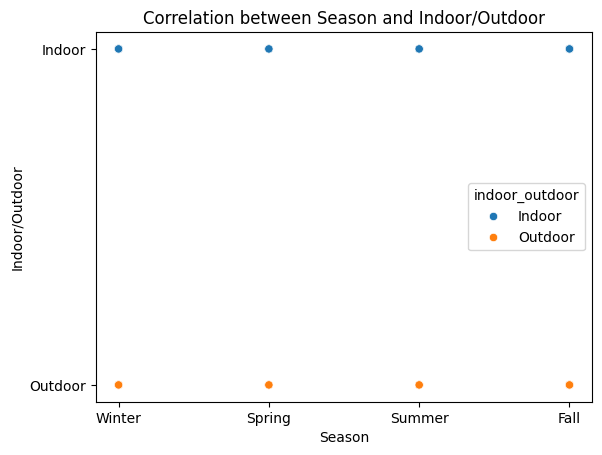

In [58]:
one_hot_encoded_df = pd.get_dummies(df_price_quantity_cleaned, columns=['season', 'indoor_outdoor'], prefix=['season', 'indoor_outdoor'])

# Create a scatter plot
sns.scatterplot(data=df_price_quantity_cleaned, x='season', y='indoor_outdoor', hue='indoor_outdoor')

# Customize labels
plt.xlabel('Season')
plt.ylabel('Indoor/Outdoor')
plt.title('Correlation between Season and Indoor/Outdoor')

# Show plot
plt.show()